**Projeto EDA** **(dados para previsão de diagnóstico de câncer de mama maligno ou benigno)**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
import matplotlib.pyplot as plt


#Carregamento da base de dados
cancer = pd.read_csv("breast_cancer.csv")

In [4]:
X = cancer.iloc[:, 0:32]

X['target'] = X['y'].map({'M': 0, 'B': 1})

X.rename(columns={'y': 'class'}, inplace=True)

y = X[['target', 'class']]

#y.head(50)
X.head(50)

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,class,target
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,...,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259,B,1
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,...,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183,B,1
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,...,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773,B,1
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,...,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,B,1
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,...,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409,B,1
5,6,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,...,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,B,1
6,7,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,...,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917,B,1
7,8,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,...,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,B,1
8,9,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,...,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025,B,1
9,10,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,...,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408,B,1


Há a necessidade de **eliminação de dado um ruidoso**. Verifica-se que a coluna "unnamed : 0 " está apenas funcionando como um id sendo, portanto, **desnecessaria** para a análise dos dados. A eliminação será feita a seguir:

In [5]:
X.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
X.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,class,target
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B,1
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B,1
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B,1
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B,1
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B,1


Nossa base de dados possui **32 colunas** (após a eliminação anterior).

Da **coluna 0 à 29**, o tipo de dado presente é **float64**.

A **coluna 30 (class)** é do tipo **object** e contém valores de texto. Ela mapeia os valores da coluna "alvo" para as classes correspondentes, como "benigno" e "maligno". Além disso, nosso conjunto de dados possui **569 linhas com índices de 0 a 568**.

Na **coluna 31 (target)**, os dados são do tipo **int64** e representam com o **número 0 os tumores benignos** e com o **número 1 os tumores malignos**.

**Memória Usada**: 146.8+ KB

Isso pode ser analisado na célula a seguir:



In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

Constata-se que a base breast_cancer **não contém valores ausentes**:

In [8]:
valoresAusentes = X.isnull().sum()
print(valoresAusentes)

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
class                  0
target                 0
dtype: int64


**Estatística descritiva** **da base de dados breast_cancer**

Com a moda da variável categórica, é possível notar que há mais incidência de casos de câncer de mama **benignos** do que **malignos**:


In [9]:
#Moda da variável categorica
modas = y['class'].mode()
print("\nModa da variável 'class'")
print(modas)


Moda da variável 'class'
0    B
Name: class, dtype: object


Percebe-se que há um **desbalanceamento das classes** pois existem mais casos de câncer benigno do que maligno, exigindo, futuramente, um **balanceamento** usando **Subamostragem (undersampling)** ou **Sobreamostragem (oversampling)**:

In [10]:
#frequência da variável categorica
frequencia = y['class'].value_counts()
print("\nFrequência para a variável 'class':")
print(frequencia)


Frequência para a variável 'class':
B    357
M    212
Name: class, dtype: int64


O gráfico a seguir enfatiza o que foi dito anteriormente: há uma **discrepância considerável** entre a quantidade de casos malignos e a quantidade de casos benignos.

<Axes: xlabel='class', ylabel='count'>

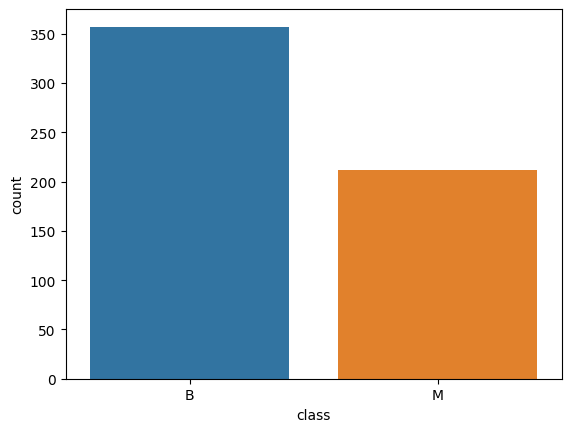

In [11]:
sns.countplot(x='class', data= y)

Agora, realiza-se o **balanceamento do conjunto de dados**, com o objetivo de resolver o problema relatado anteriormente.

(balanceamento da classe majoritaria (357) e da classe minoritaria (212) usando subamostragem e equalizando a majoritaria para a minoritaria)

<Axes: xlabel='class', ylabel='count'>

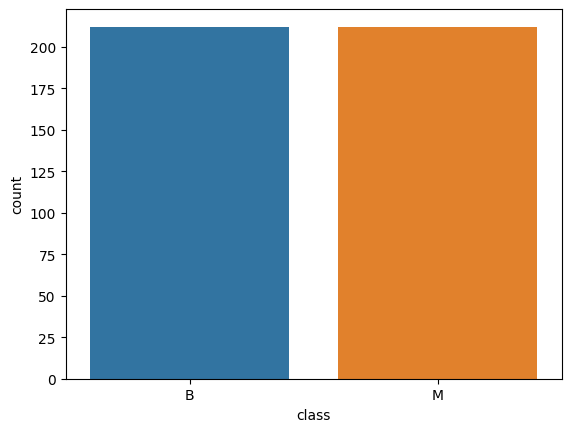

In [12]:

majoritaria = X[X['class'] == 'B']
minoritaria = X[X['class'] == 'M']


numero_de_exemplos = len(minoritaria)


majoritaria_subamostrada = resample(majoritaria, replace=False, n_samples=numero_de_exemplos, random_state=42)


dataset_balanceado = pd.concat([majoritaria_subamostrada, minoritaria])

sns.countplot(x='class', data = dataset_balanceado)





In [13]:
dataset_balanceado.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,class,target
222,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,B,1
42,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468,B,1
291,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,B,1
300,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,B,1
56,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,B,1


In [14]:
# Médias
medias = dataset_balanceado.mean(numeric_only=True)
print("Médias")
print(medias)

Médias
x.radius_mean           14.821941
x.texture_mean          19.960071
x.perimeter_mean        96.807500
x.area_mean            722.191038
x.smoothness_mean        0.097378
x.compactness_mean       0.111792
x.concavity_mean         0.103246
x.concave_pts_mean       0.056629
x.symmetry_mean          0.183776
x.fractal_dim_mean       0.062689
x.radius_se              0.449078
x.texture_se             1.226193
x.perimeter_se           3.176326
x.area_se               47.123590
x.smoothness_se          0.006887
x.compactness_se         0.026864
x.concavity_se           0.034311
x.concave_pts_se         0.012417
x.symmetry_se            0.020413
x.fractal_dim_se         0.003856
x.radius_worst          17.285481
x.texture_worst         26.659717
x.perimeter_worst      114.316910
x.area_worst           993.077594
x.smoothness_worst       0.134395
x.compactness_worst      0.278115
x.concavity_worst        0.308461
x.concave_pts_worst      0.128366
x.symmetry_worst         0.296294
x.fract

In [15]:
# Medianas
medianas = dataset_balanceado.median(numeric_only=True)
print("Medianas")
print(medianas)

Medianas
x.radius_mean           14.035000
x.texture_mean          19.745000
x.perimeter_mean        91.325000
x.area_mean            607.800000
x.smoothness_mean        0.097175
x.compactness_mean       0.103700
x.concavity_mean         0.083245
x.concave_pts_mean       0.048920
x.symmetry_mean          0.181300
x.fractal_dim_mean       0.061400
x.radius_se              0.354450
x.texture_se             1.127000
x.perimeter_se           2.569000
x.area_se               29.015000
x.smoothness_se          0.006302
x.compactness_se         0.022160
x.concavity_se           0.027985
x.concave_pts_se         0.011640
x.symmetry_se            0.018545
x.fractal_dim_se         0.003321
x.radius_worst          16.160000
x.texture_worst         26.265000
x.perimeter_worst      106.100000
x.area_worst           793.800000
x.smoothness_worst       0.134050
x.compactness_worst      0.234700
x.concavity_worst        0.274550
x.concave_pts_worst      0.122550
x.symmetry_worst         0.284300
x.fra

In [16]:
# Variâncias
variancias = dataset_balanceado.var(numeric_only=True)
print("Variâncias")
print(variancias)

Variâncias
x.radius_mean              13.743613
x.texture_mean             18.431105
x.perimeter_mean          654.825598
x.area_mean            142896.865120
x.smoothness_mean           0.000197
x.compactness_mean          0.003106
x.concavity_mean            0.007184
x.concave_pts_mean          0.001696
x.symmetry_mean             0.000783
x.fractal_dim_mean          0.000052
x.radius_se                 0.092210
x.texture_se                0.310180
x.perimeter_se              4.945060
x.area_se                2576.654363
x.smoothness_se             0.000008
x.compactness_se            0.000337
x.concavity_se              0.001029
x.concave_pts_se            0.000040
x.symmetry_se               0.000072
x.fractal_dim_se            0.000007
x.radius_worst             26.031222
x.texture_worst            37.304758
x.perimeter_worst        1259.643302
x.area_worst           377287.969402
x.smoothness_worst          0.000544
x.compactness_worst         0.028249
x.concavity_worst          

In [17]:
# Desvio Padrão
desvio_padrao = dataset_balanceado.std(numeric_only=True)
print("Desvio Padrão")
print(desvio_padrao)

Desvio Padrão
x.radius_mean            3.707238
x.texture_mean           4.293146
x.perimeter_mean        25.589560
x.area_mean            378.017017
x.smoothness_mean        0.014048
x.compactness_mean       0.055733
x.concavity_mean         0.084759
x.concave_pts_mean       0.041188
x.symmetry_mean          0.027975
x.fractal_dim_mean       0.007204
x.radius_se              0.303662
x.texture_se             0.556938
x.perimeter_se           2.223749
x.area_se               50.760756
x.smoothness_se          0.002805
x.compactness_se         0.018371
x.concavity_se           0.032085
x.concave_pts_se         0.006357
x.symmetry_se            0.008487
x.fractal_dim_se         0.002605
x.radius_worst           5.102080
x.texture_worst          6.107762
x.perimeter_worst       35.491454
x.area_worst           614.237714
x.smoothness_worst       0.023316
x.compactness_worst      0.168074
x.concavity_worst        0.218794
x.concave_pts_worst      0.068176
x.symmetry_worst         0.065889


In [18]:
# Quartis
Q1 = dataset_balanceado.quantile(0.25,numeric_only=True )
Q2 = dataset_balanceado.quantile(0.5,numeric_only=True)
Q3 = dataset_balanceado.quantile(0.75,numeric_only=True)
Q4 = dataset_balanceado.quantile(1.0,numeric_only=True)
print("Primeiro Quartil")
print(Q1)
print("")
print("Segundo Quartil")
print(Q2)
print("")
print("Terceiro Quartil")
print(Q3)

Primeiro Quartil
x.radius_mean           12.047500
x.texture_mean          16.947500
x.perimeter_mean        77.602500
x.area_mean            449.125000
x.smoothness_mean        0.087355
x.compactness_mean       0.068045
x.concavity_mean         0.035490
x.concave_pts_mean       0.023270
x.symmetry_mean          0.164025
x.fractal_dim_mean       0.057218
x.radius_se              0.246875
x.texture_se             0.856100
x.perimeter_se           1.751500
x.area_se               19.365000
x.smoothness_se          0.005124
x.compactness_se         0.013950
x.concavity_se           0.016882
x.concave_pts_se         0.008668
x.symmetry_se            0.014972
x.fractal_dim_se         0.002296
x.radius_worst          13.337500
x.texture_worst         22.145000
x.perimeter_worst       86.150000
x.area_worst           546.200000
x.smoothness_worst       0.118875
x.compactness_worst      0.156075
x.concavity_worst        0.137700
x.concave_pts_worst      0.071705
x.symmetry_worst         0.2545

In [19]:
# Intervalo Interquartil
IQR = Q3 - Q1
maximo = dataset_balanceado.max(numeric_only=True)
minimo = dataset_balanceado.min(numeric_only=True)

# Intervalo
Intervalo = maximo - minimo
print("Intervalos")
print(Intervalo)
print("")
print("Intervalos Interquartil (Q3 - Q1)")
print(IQR)

Intervalos
x.radius_mean            20.419000
x.texture_mean           29.570000
x.perimeter_mean        140.520000
x.area_mean            2330.600000
x.smoothness_mean         0.100890
x.compactness_mean        0.326020
x.concavity_mean          0.426800
x.concave_pts_mean        0.201200
x.symmetry_mean           0.198000
x.fractal_dim_mean        0.047480
x.radius_se               2.761500
x.texture_se              4.524800
x.perimeter_se           21.223000
x.area_se               535.398000
x.smoothness_se           0.029417
x.compactness_se          0.133148
x.concavity_se            0.396000
x.concave_pts_se          0.052790
x.symmetry_se             0.071068
x.fractal_dim_se          0.028945
x.radius_worst           27.362000
x.texture_worst          37.520000
x.perimeter_worst       196.710000
x.area_worst           4030.400000
x.smoothness_worst        0.151430
x.compactness_worst       1.030710
x.concavity_worst         1.252000
x.concave_pts_worst       0.291000
x.symmetr

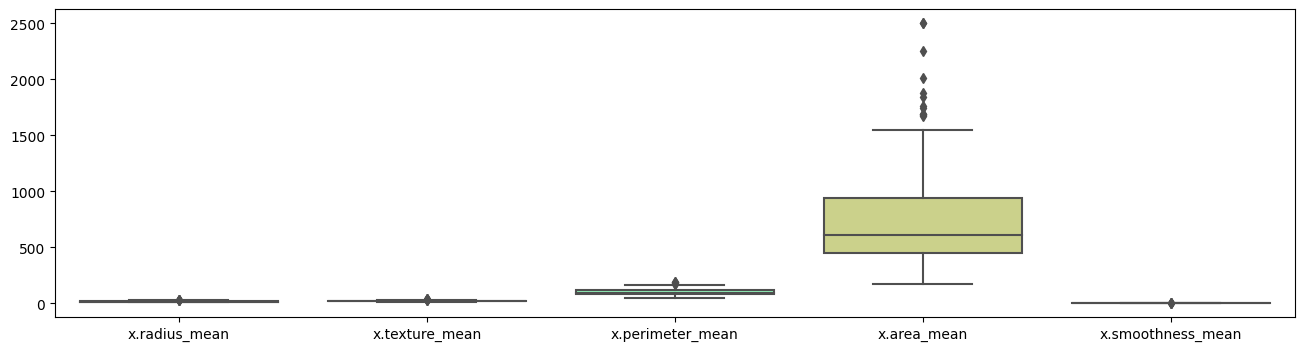

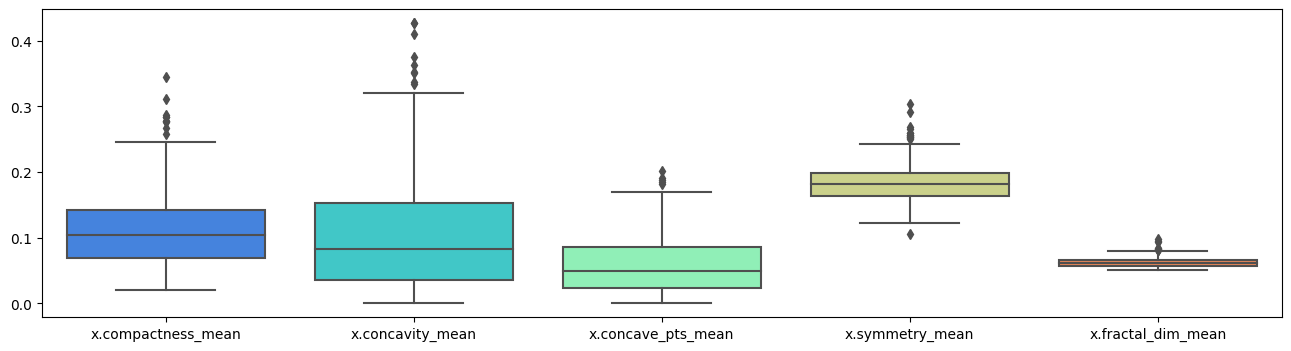

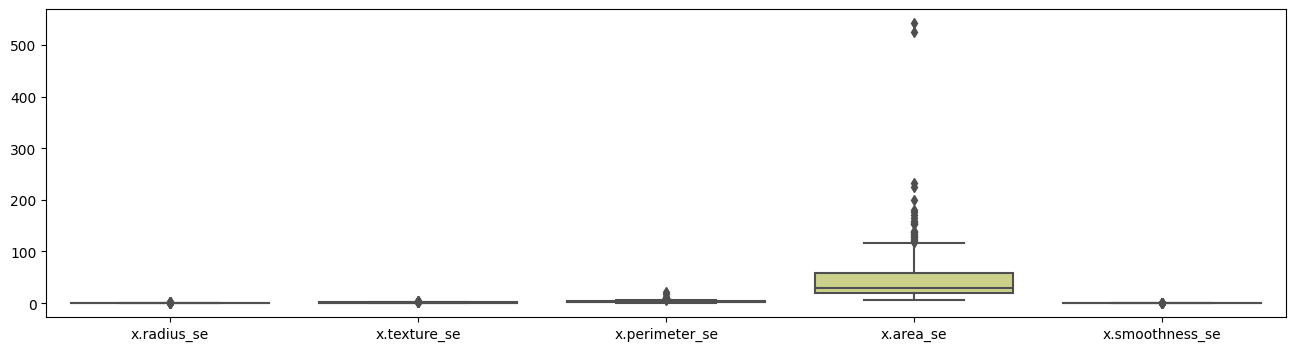

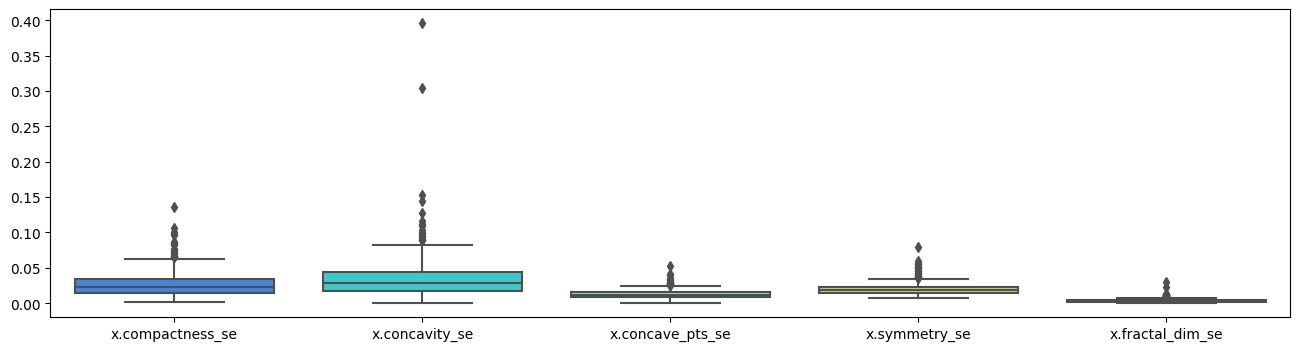

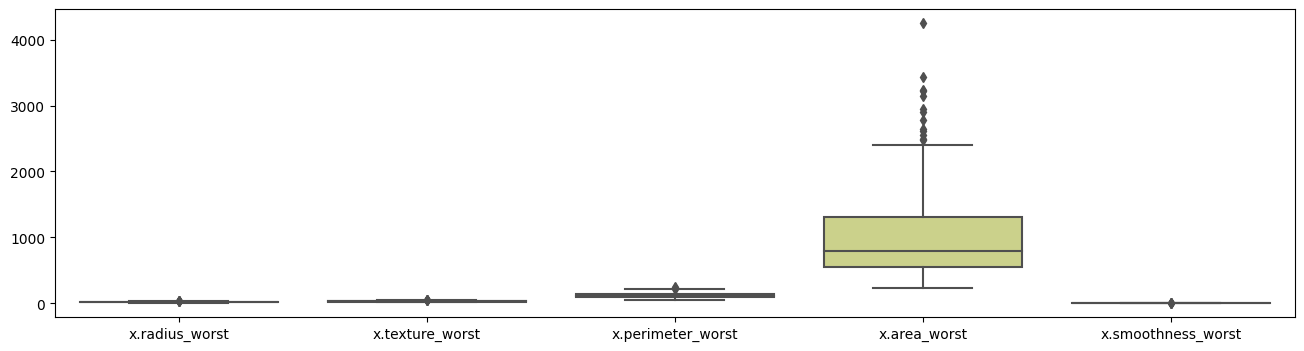

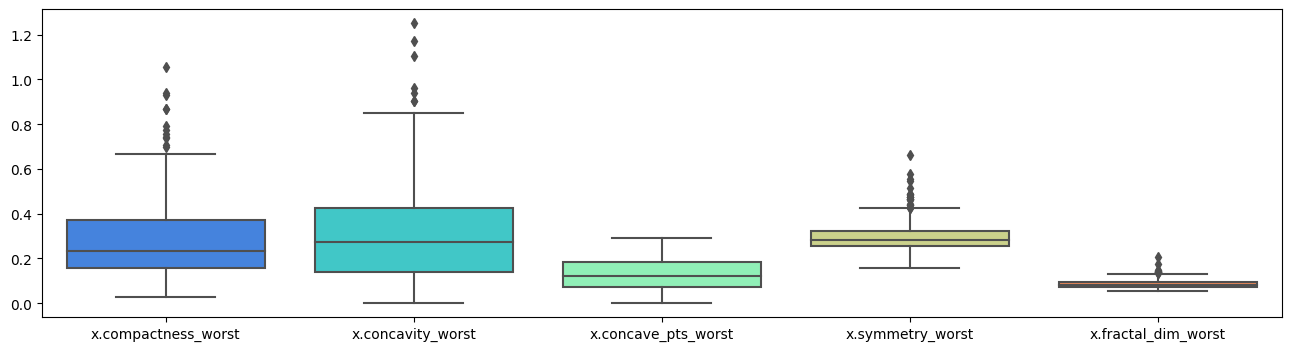

In [20]:
# Boxplots

plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_balanceado.iloc()[:,0:5], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_balanceado.iloc()[:,5:10], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_balanceado.iloc()[:,10:15], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_balanceado.iloc()[:,15:20], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_balanceado.iloc()[:,20:25], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_balanceado.iloc()[:,25:30], palette='rainbow')
plt.show()

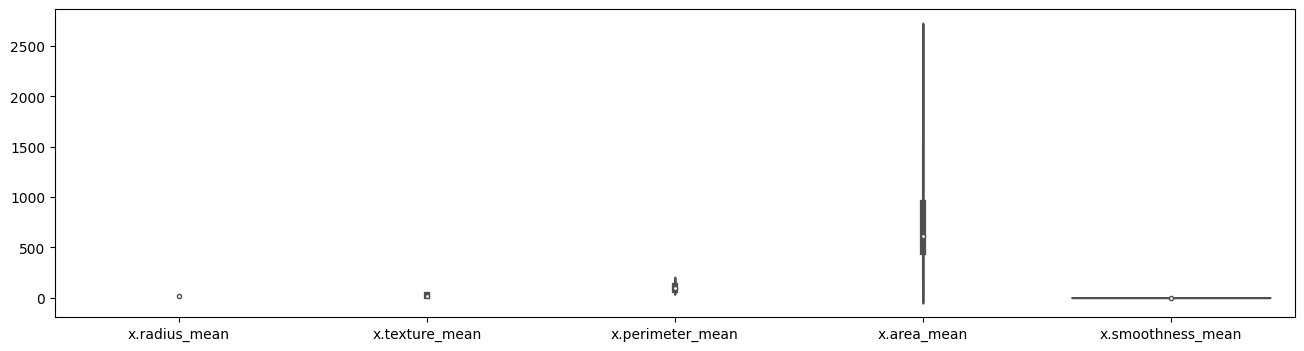

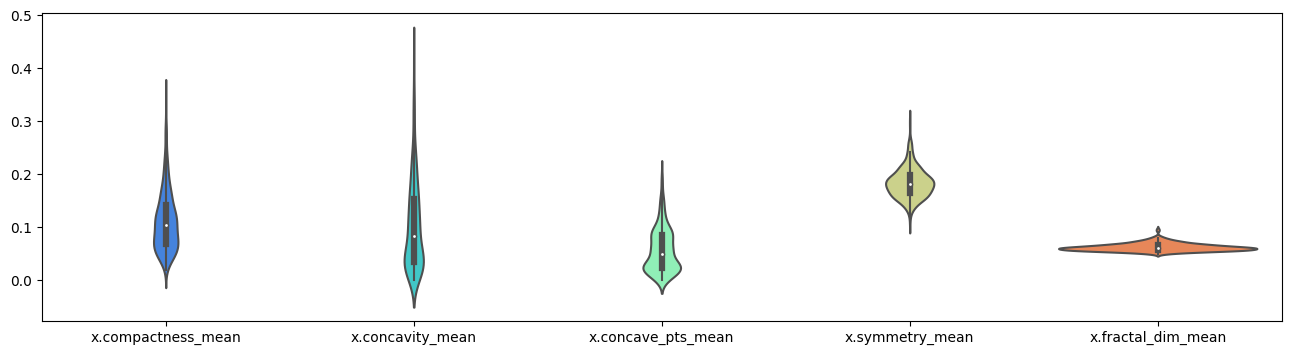

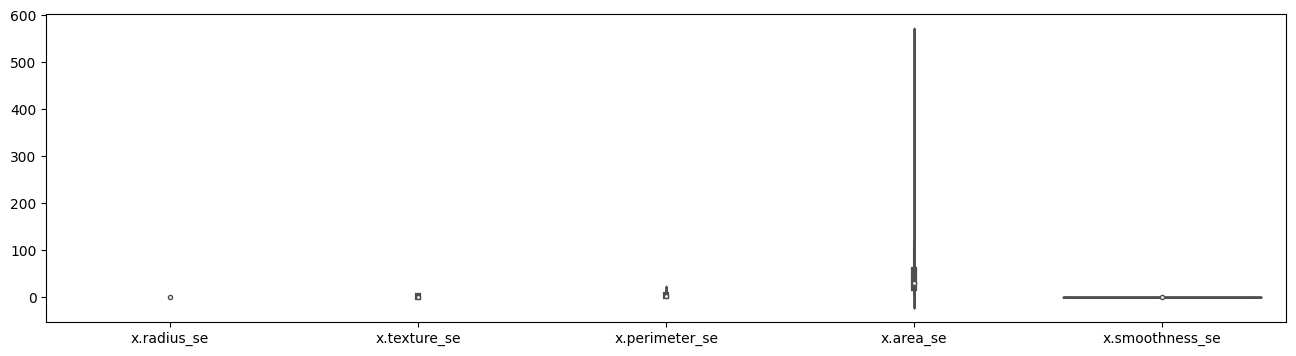

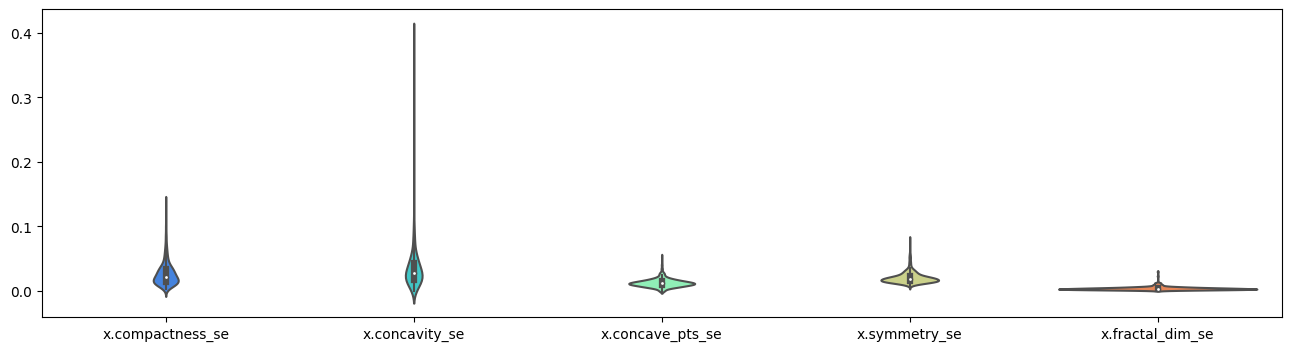

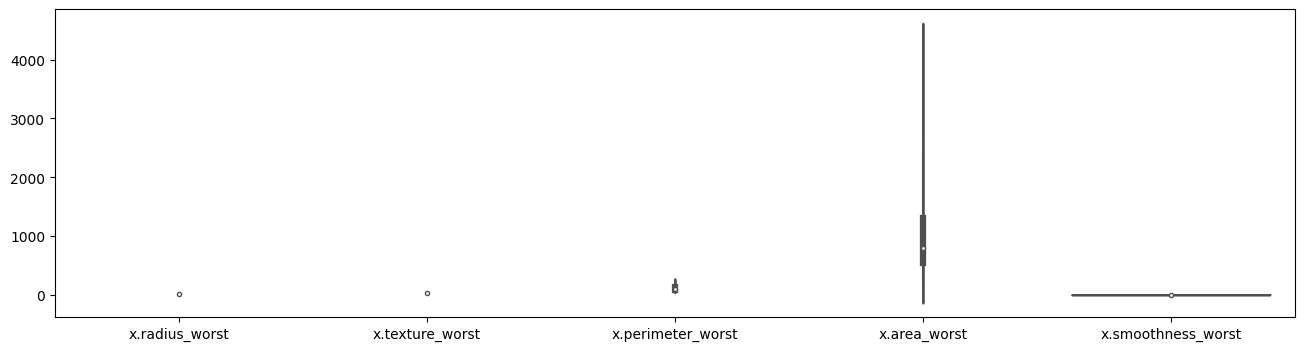

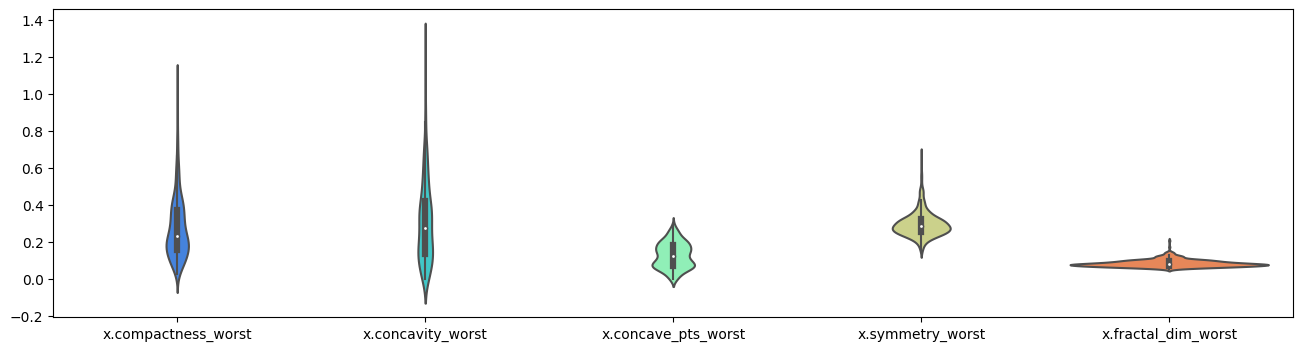

In [21]:
# Violin Plots
plt.figure(figsize=(16,4))
sns.violinplot(data=dataset_balanceado.iloc()[:,0:5], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.violinplot(data=dataset_balanceado.iloc()[:,5:10], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.violinplot(data=dataset_balanceado.iloc()[:,10:15], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.violinplot(data=dataset_balanceado.iloc()[:,15:20], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.violinplot(data=dataset_balanceado.iloc()[:,20:25], palette='rainbow')
plt.show()

plt.figure(figsize=(16,4))
sns.violinplot(data=dataset_balanceado.iloc()[:,25:30], palette='rainbow')
plt.show()


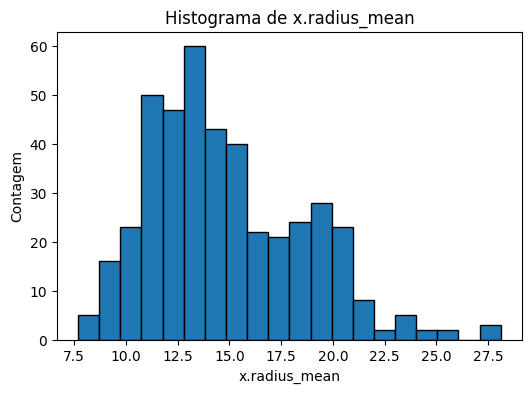

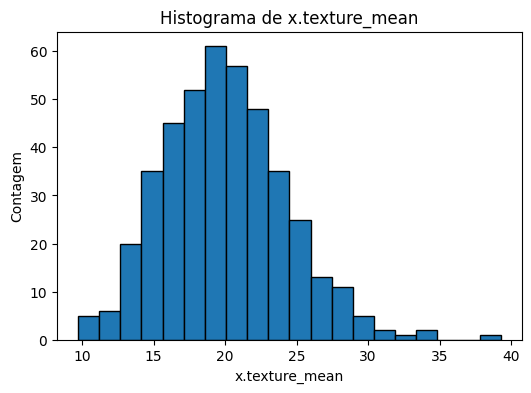

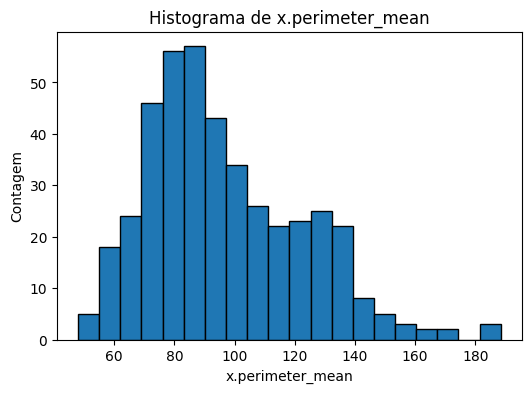

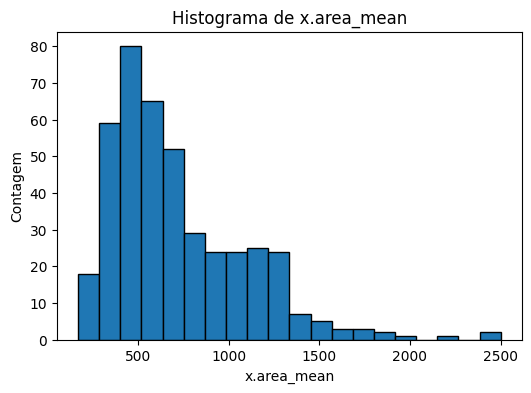

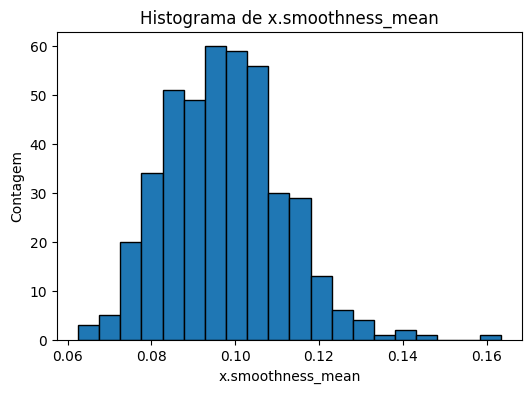

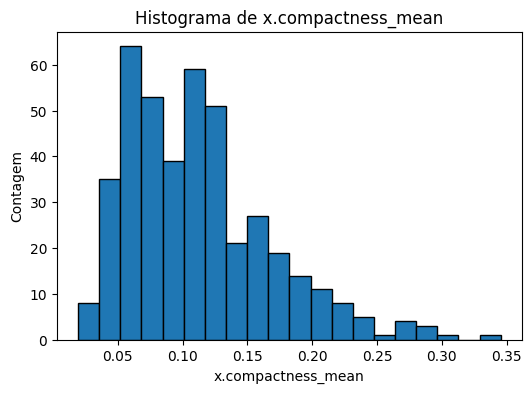

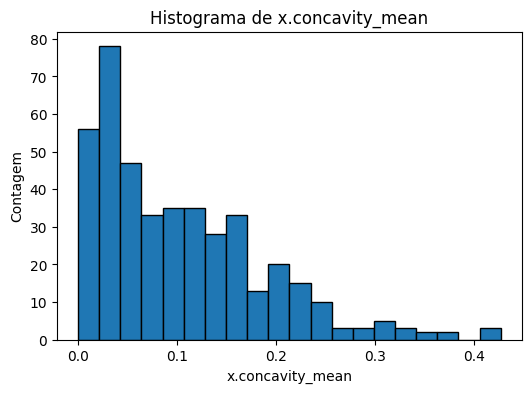

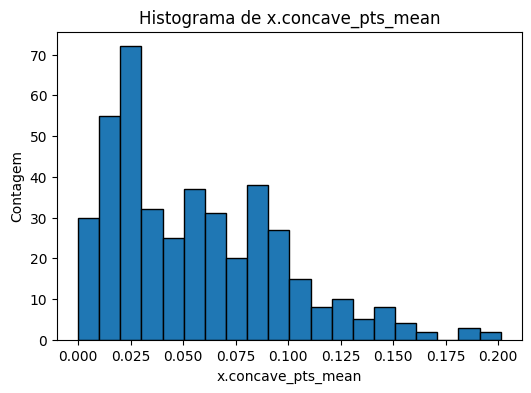

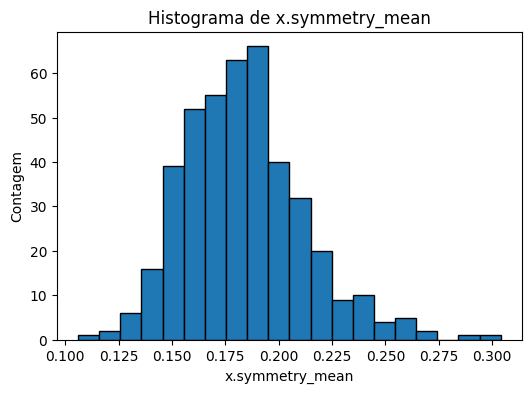

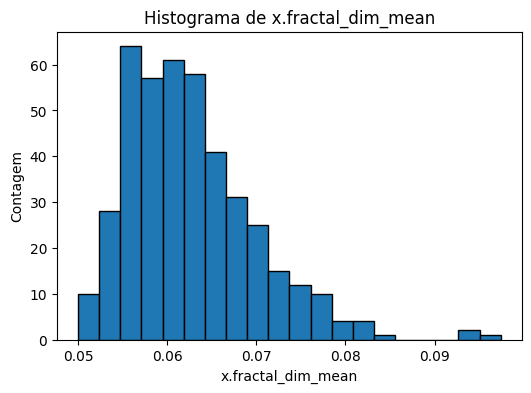

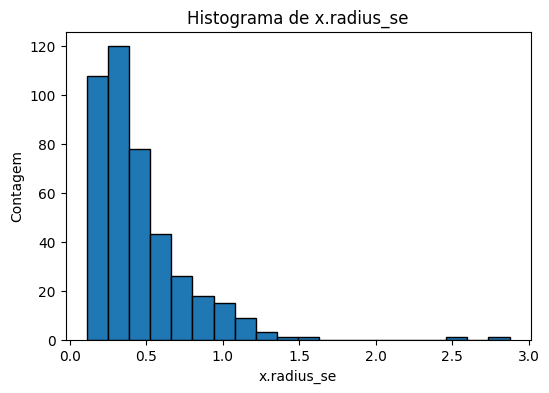

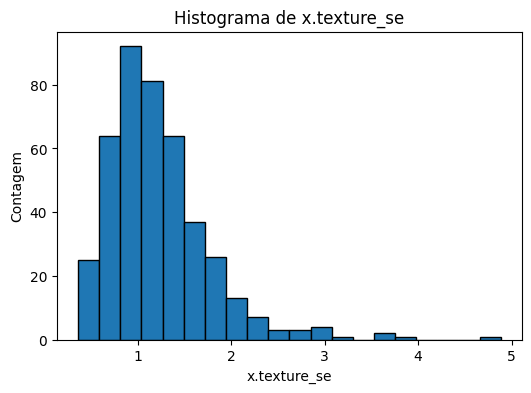

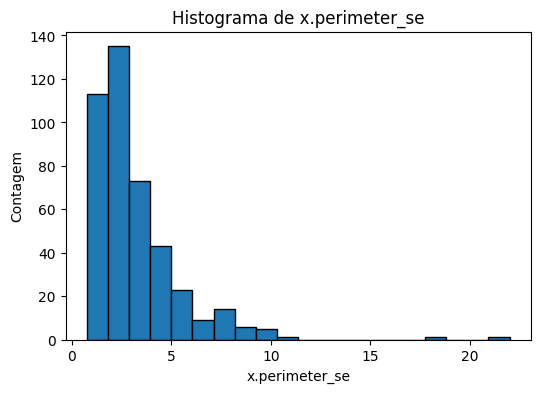

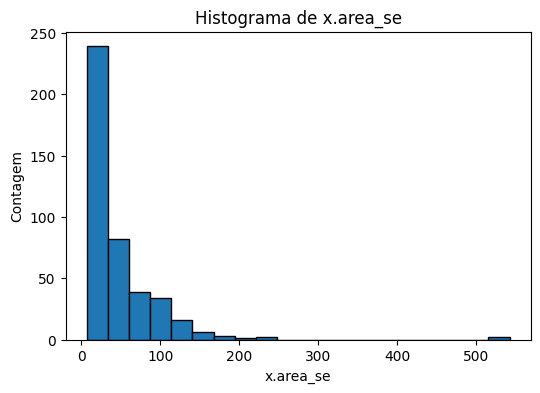

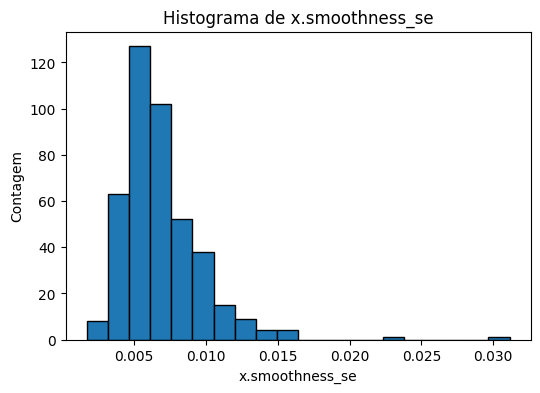

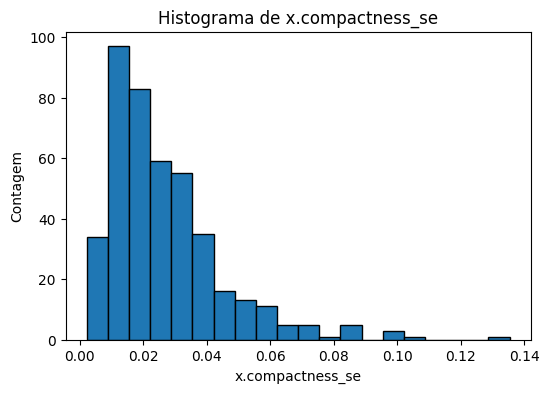

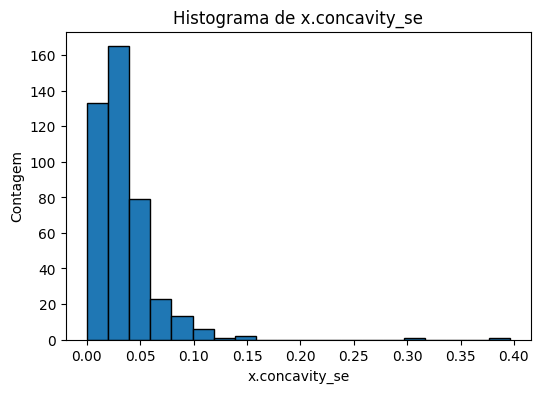

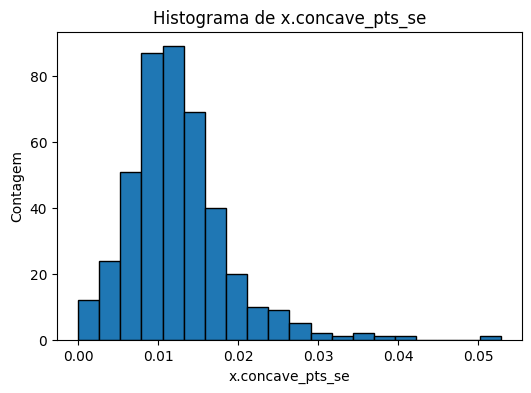

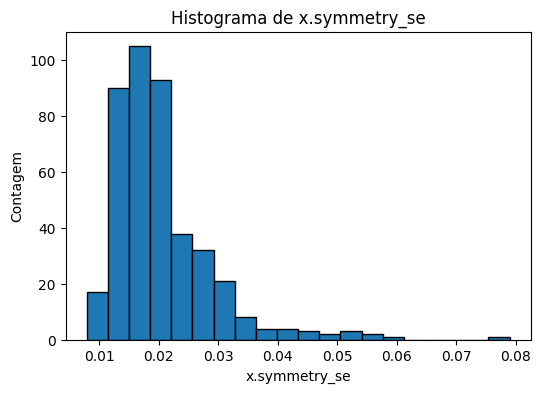

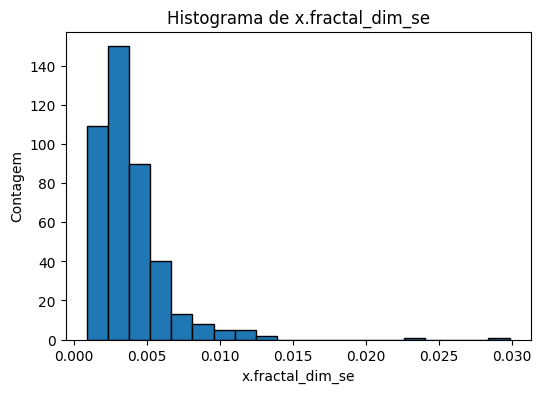

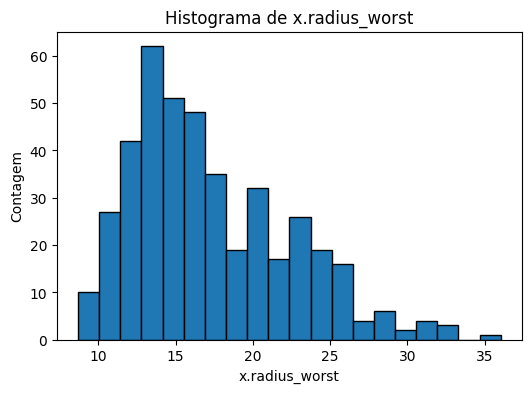

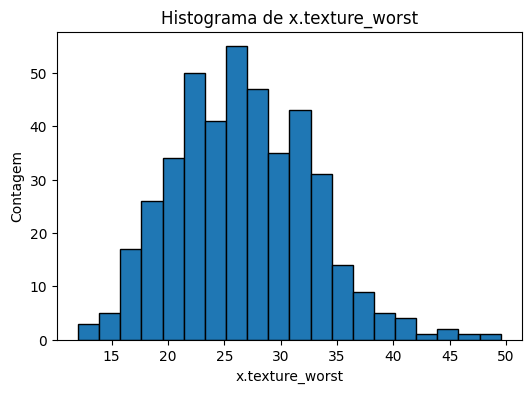

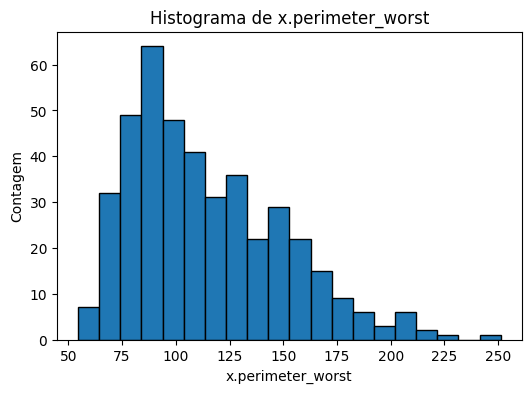

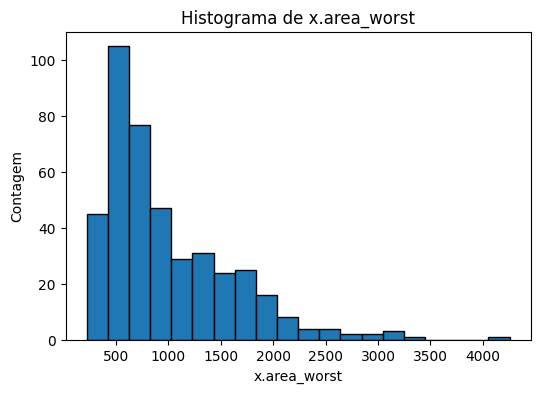

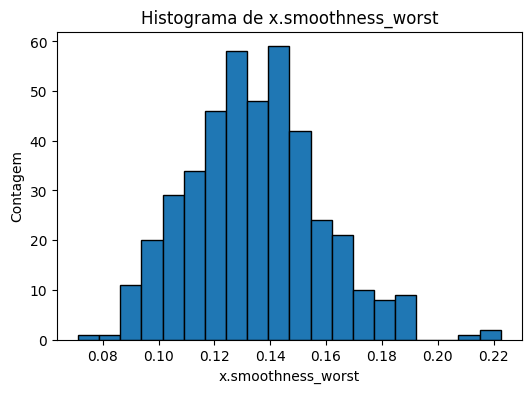

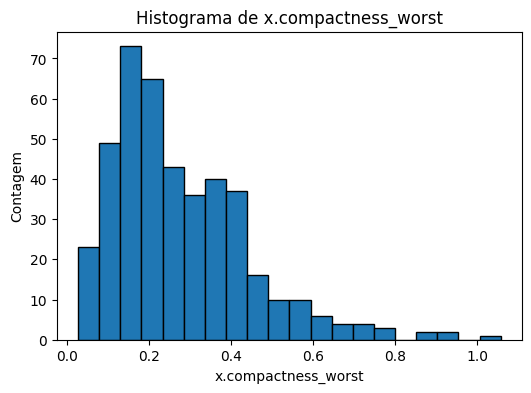

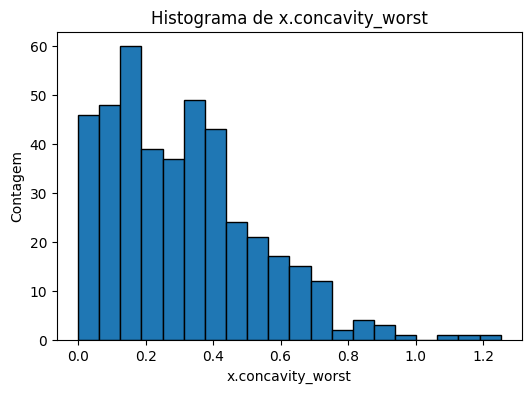

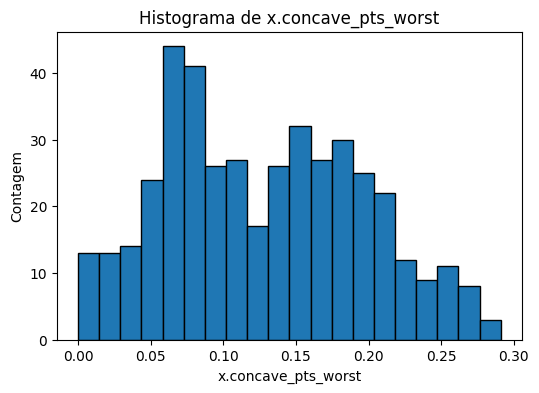

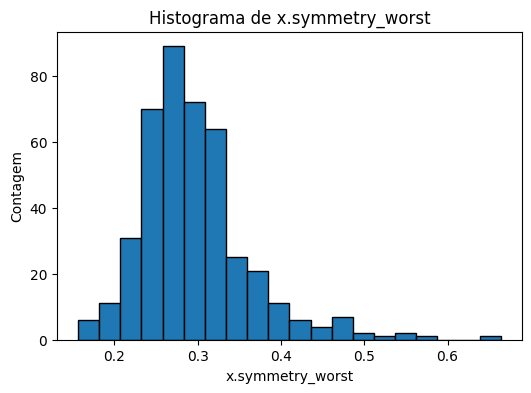

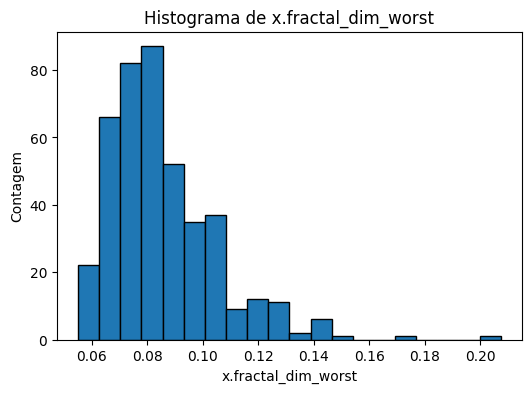

In [22]:
# Histogramas
for column in dataset_balanceado.iloc[:,0:30].columns:
  plt.figure(figsize=(6, 4))
  plt.hist(dataset_balanceado[column], bins=20, edgecolor='black')
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Contagem')
  plt.show()


In [23]:
# Covariâncias
print(X.cov())

                     x.radius_mean  x.texture_mean  x.perimeter_mean  \
x.radius_mean            12.418920        4.907582         85.447142   
x.texture_mean            4.907582       18.498909         34.439759   
x.perimeter_mean         85.447142       34.439759        590.440480   
x.area_mean            1224.483409      485.993787       8435.772345   
x.smoothness_mean         0.008454       -0.001415          0.070836   
x.compactness_mean        0.094197        0.053767          0.714714   
x.concavity_mean          0.190128        0.103692          1.387234   
x.concave_pts_mean        0.112475        0.048977          0.802360   
x.symmetry_mean           0.014273        0.008419          0.121922   
x.fractal_dim_mean       -0.007754       -0.002321         -0.044859   
x.radius_se               0.663650        0.329037          4.661401   
x.texture_se             -0.189189        0.916695         -1.162988   
x.perimeter_se            4.803550        2.449449         34.05

<ipython-input-23-919a9cef58f9>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X.cov())


In [24]:
# Correlações
print(X.corr())

                     x.radius_mean  x.texture_mean  x.perimeter_mean  \
x.radius_mean             1.000000        0.323782          0.997855   
x.texture_mean            0.323782        1.000000          0.329533   
x.perimeter_mean          0.997855        0.329533          1.000000   
x.area_mean               0.987357        0.321086          0.986507   
x.smoothness_mean         0.170581       -0.023389          0.207278   
x.compactness_mean        0.506124        0.236702          0.556936   
x.concavity_mean          0.676764        0.302418          0.716136   
x.concave_pts_mean        0.822529        0.293464          0.850977   
x.symmetry_mean           0.147741        0.071401          0.183027   
x.fractal_dim_mean       -0.311631       -0.076437         -0.261477   
x.radius_se               0.679090        0.275869          0.691765   
x.texture_se             -0.097317        0.386358         -0.086761   
x.perimeter_se            0.674172        0.281673          0.69

<ipython-input-24-372922fe86f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X.corr())


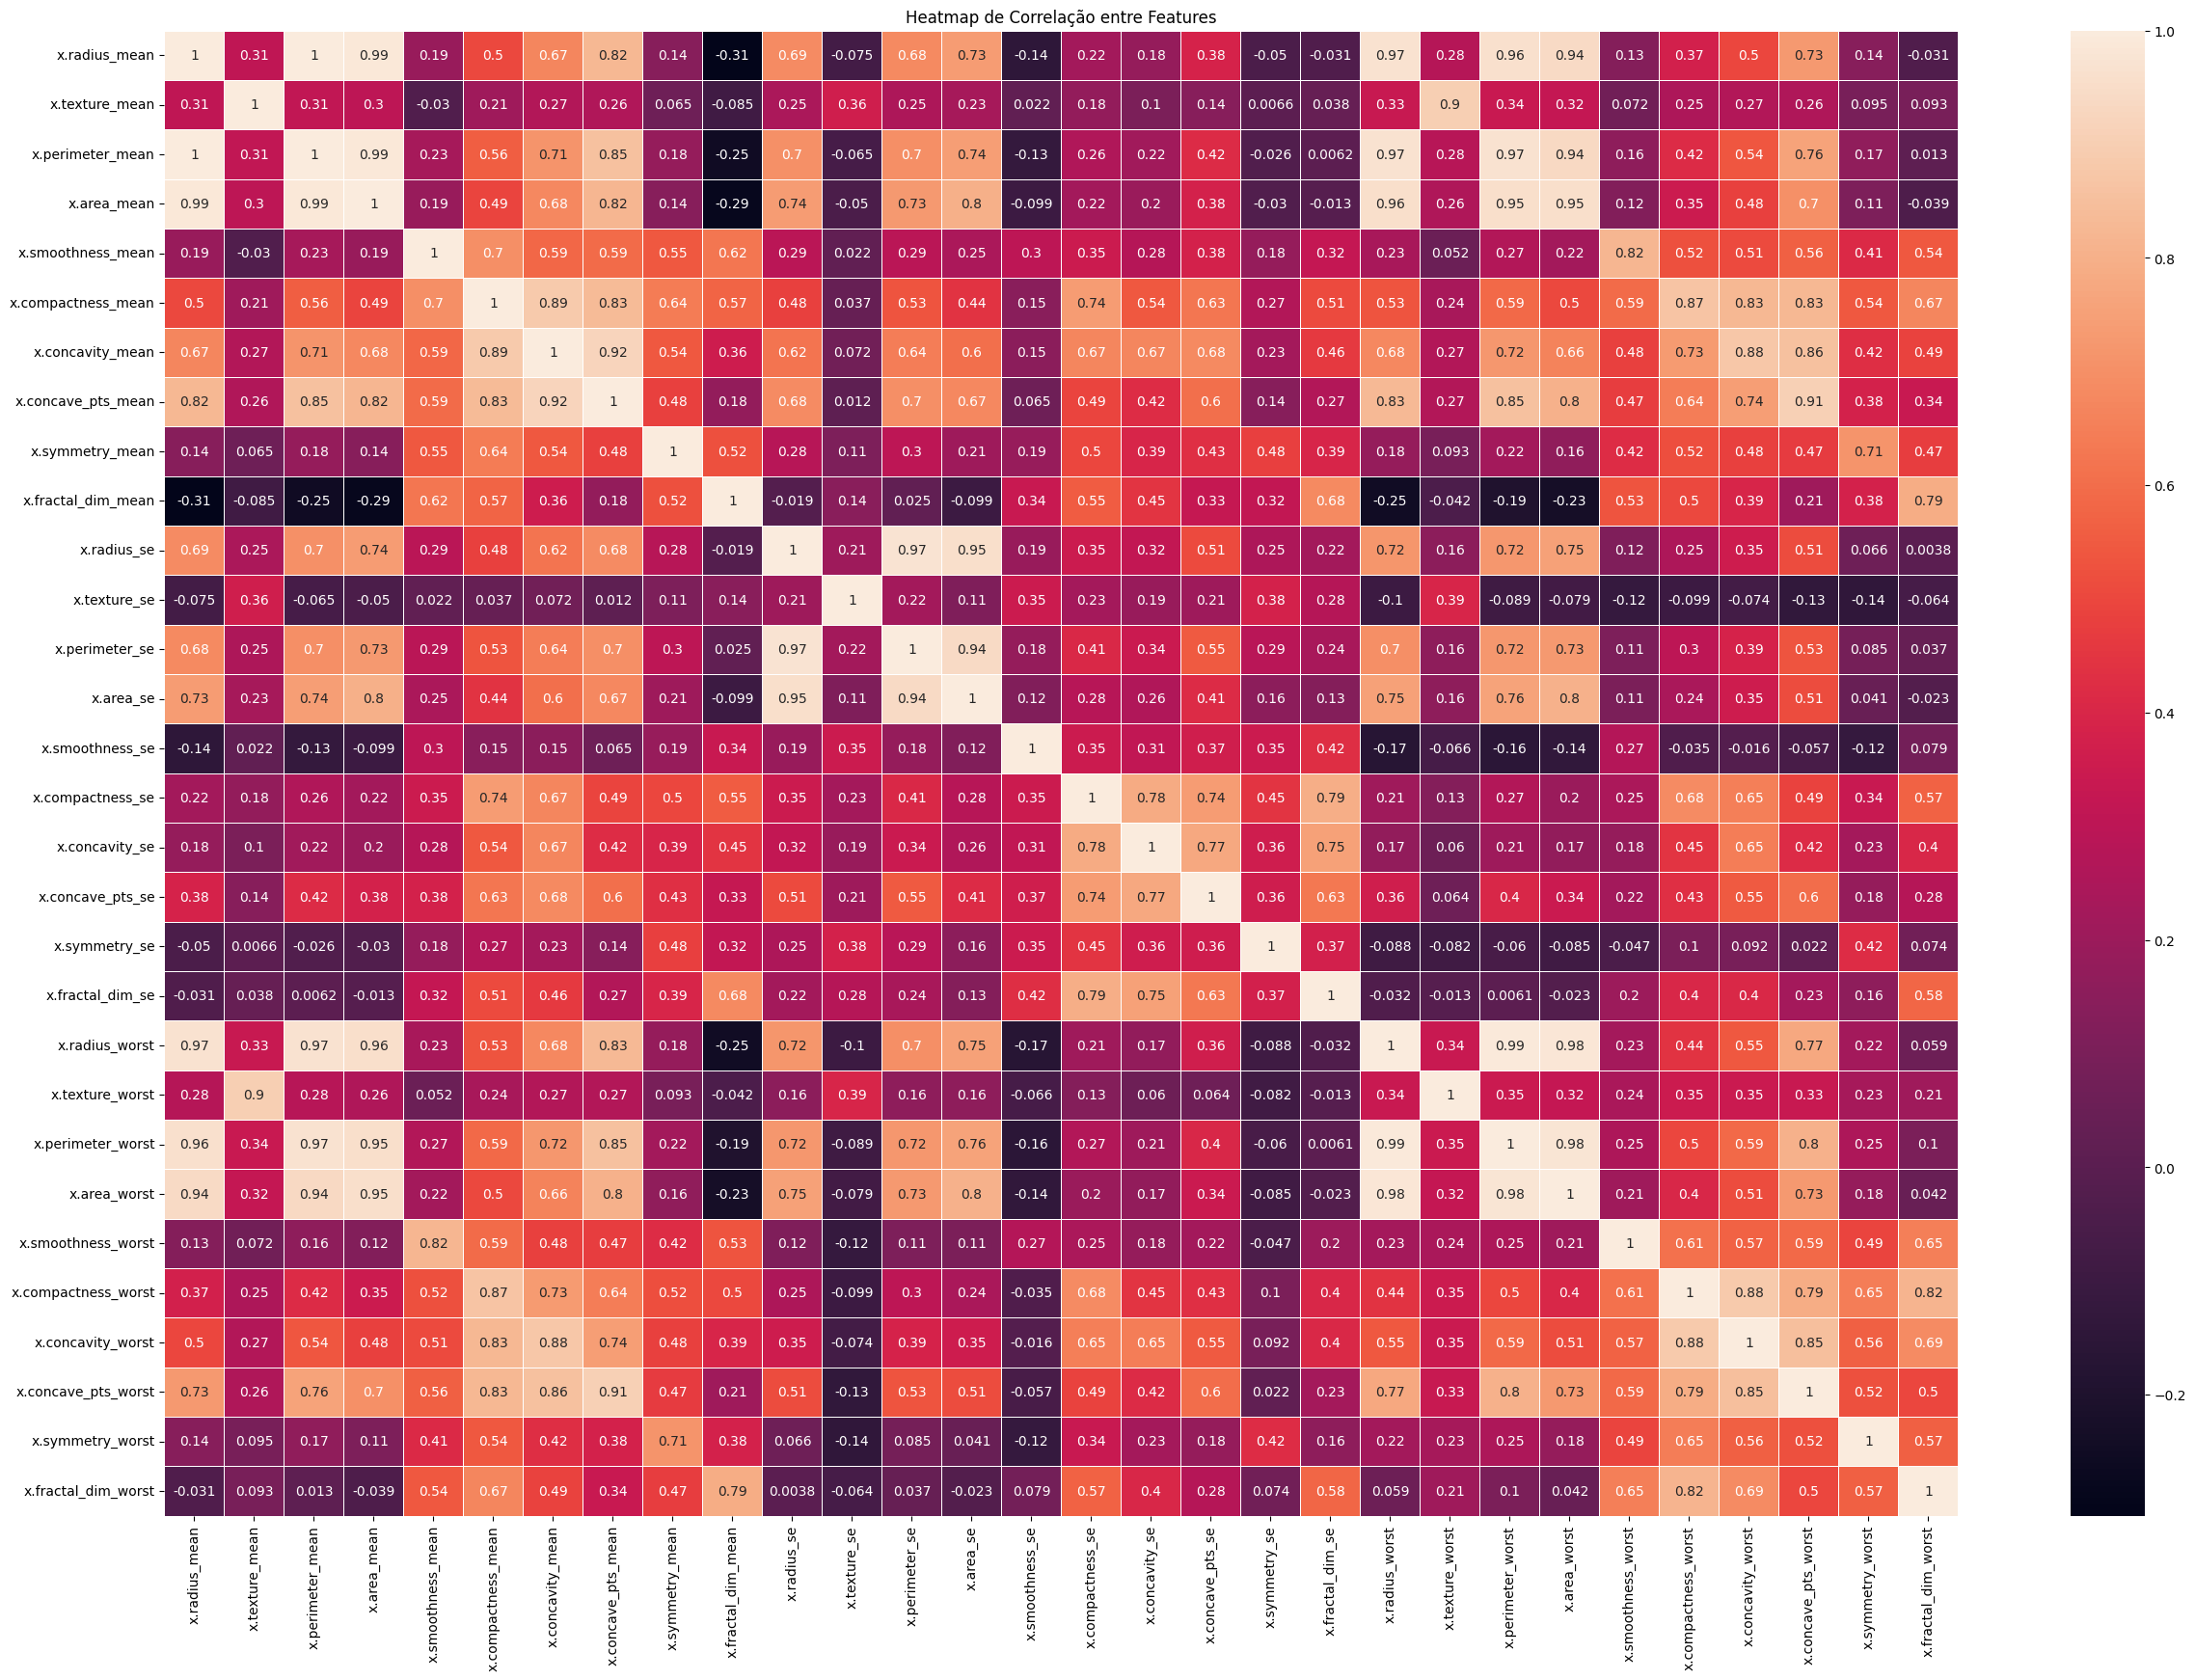

In [25]:
plt.figure(figsize=(30, 20))
sns.heatmap(dataset_balanceado.iloc[:, 0:30].corr(), annot=True, linewidth=0.5)
plt.title('Heatmap de Correlação entre Features')
plt.show()

com base na analise do heatmap
fica evidente que as variáveis **x.fractal_dim_mean**,
**x.smoothness_mean** talvez não sejam tão interessantes para a previsão,
uma vez que a maioria de seus relacionamentos são negativos com outras variaveis. Outro detalhe importante, é que elas ficam com os relacionamentos bem mais negativos quando relacionadas com valores representantes da forma do tumor como raio, perimetro e área por exemplo. Outra característica importante, são os relacionamentos entre as features referentes a forma do tumor que são tão fortes que são iguais a 1 e não estão na diagonal principal e além disso elas têm os relacionamentos mais fortes do heatmap no geral.


Na célula a seguir, é feita a **verificação da existência de valores duplicados no heatmap**.

In [26]:
duplicatas = dataset_balanceado[dataset_balanceado.duplicated(keep=False)]

if not duplicatas.empty:
    print("Valores duplicados encontrados:")
    print(duplicatas)
else:
    print("Nenhuma duplicata encontrada.")
print(duplicatas)

Nenhuma duplicata encontrada.
Empty DataFrame
Columns: [x.radius_mean, x.texture_mean, x.perimeter_mean, x.area_mean, x.smoothness_mean, x.compactness_mean, x.concavity_mean, x.concave_pts_mean, x.symmetry_mean, x.fractal_dim_mean, x.radius_se, x.texture_se, x.perimeter_se, x.area_se, x.smoothness_se, x.compactness_se, x.concavity_se, x.concave_pts_se, x.symmetry_se, x.fractal_dim_se, x.radius_worst, x.texture_worst, x.perimeter_worst, x.area_worst, x.smoothness_worst, x.compactness_worst, x.concavity_worst, x.concave_pts_worst, x.symmetry_worst, x.fractal_dim_worst, class, target]
Index: []

[0 rows x 32 columns]


## **Scatter Plots**

> Análises feitas após visualização dos gráficos.



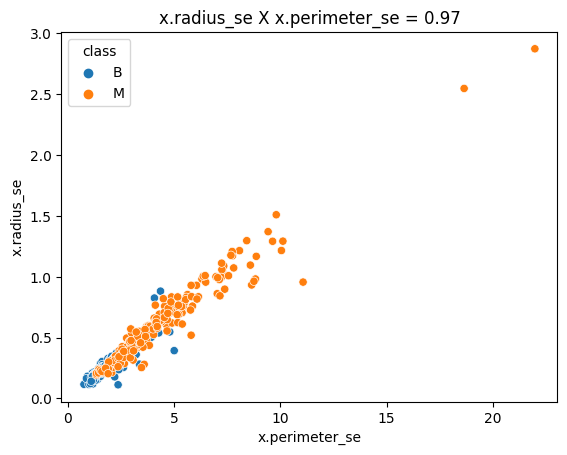

In [27]:
# Scatter Plot
sns.scatterplot(x='x.perimeter_se', y='x.radius_se',  hue = 'class', data = dataset_balanceado)
plt.title('x.radius_se X x.perimeter_se = 0.97')
plt.show()


Verifica-se no gráfico acima a existência de **outliers** no scatter plot e uma correlação positiva forte. Além disso, nota-se que câncer maligno tende a ter uma **margem de erro maior** que o benigno em relação ao perimetro e raio das celulas.


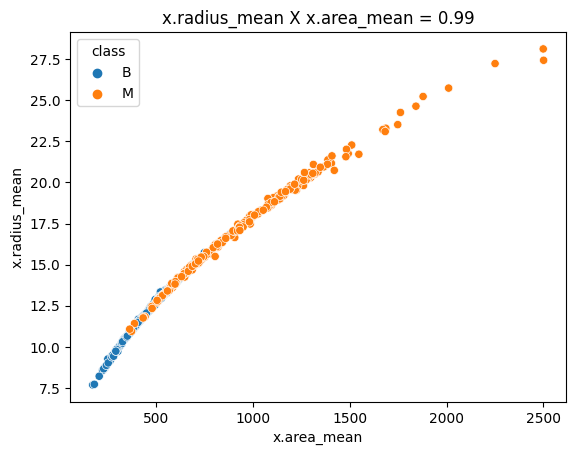

In [28]:
# Scatter Plot
sns.scatterplot(x='x.area_mean', y='x.radius_mean',  hue = 'class', data = dataset_balanceado)
plt.title('x.radius_mean X x.area_mean = 0.99')
plt.show()

Percebe-se que o câncer maligno tende a ter **o raio e a área das células maiores que o câncer benigno**. Podemos verificar que há uma correlação positiva forte com uma linha de tendência quase perfeita.

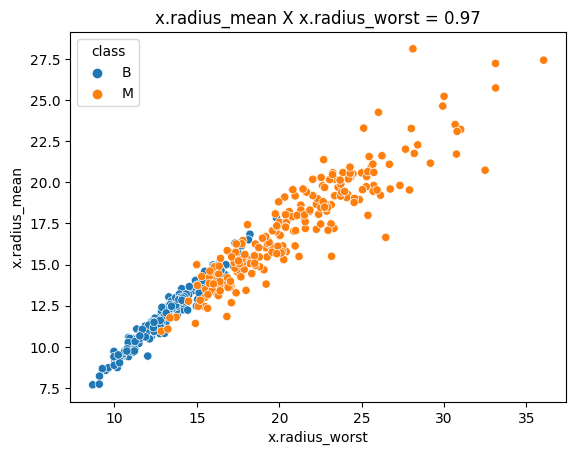

In [29]:
# Scatter Plot
sns.scatterplot(x='x.radius_worst', y='x.radius_mean',  hue = 'class', data = dataset_balanceado)
plt.title('x.radius_mean X x.radius_worst = 0.97')
plt.show()

Nota-se que **o câncer maligno tende a ter o maior valor de raio das células e consideravelmente maior raio das celulas cancerígenas do que os benignos**. Há uma correlação positiva forte-moderada.

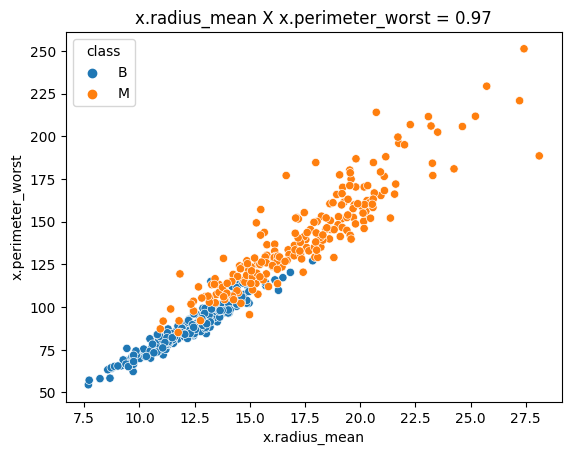

In [30]:
# Scatter Plot
sns.scatterplot(x='x.radius_mean', y='x.perimeter_worst', hue = 'class', data=dataset_balanceado)
plt.title('x.radius_mean X x.perimeter_worst = 0.97')
plt.show()

O **câncer maligno**, no geral, têm o **maior valor do perimetro entre as celulas no nucleo do tumor**. Há uma correlação positiva forte-moderada

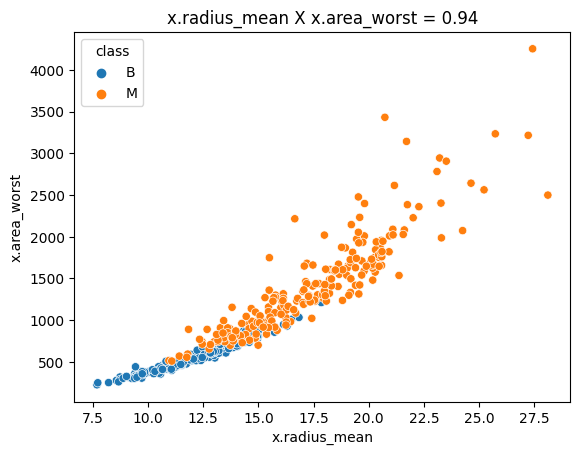

In [31]:
# Scatter Plot
sns.scatterplot(x='x.radius_mean', y='x.area_worst', hue = 'class', data=dataset_balanceado)
plt.title('x.radius_mean X x.area_worst = 0.94')
plt.show()

Verifica-se a existência de **outliers**. Além disso, constata-se que tumores **malignos** têm **maior área** entre as células no núcleo do tumor. Há uma correlação positiva forte-moderada

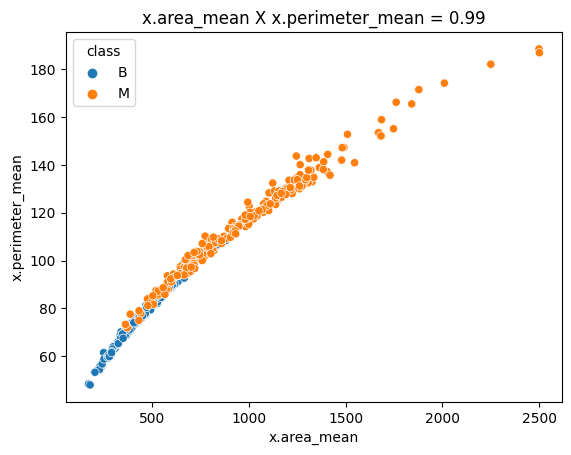

In [32]:
# Scatter Plot
sns.scatterplot(x='x.area_mean', y='x.perimeter_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.area_mean X x.perimeter_mean = 0.99')
plt.show()

Os **tumores malignos** tendem a ter um comprimento médio do perímetro
e da área **maior** que os benignos. Há uma correlação positiva forte-moderada e uma linha de tendência quase perfeita.

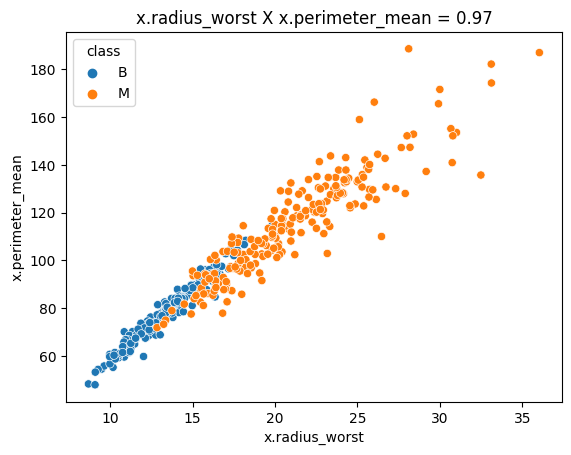

In [33]:
sns.scatterplot(x='x.radius_worst', y='x.perimeter_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.radius_worst X x.perimeter_mean = 0.97')
plt.show()

Observa-se que os **tumores malignos** tem raio e perímetro **maior** que os tumores benignos. Há correlação positiva forte-moderada

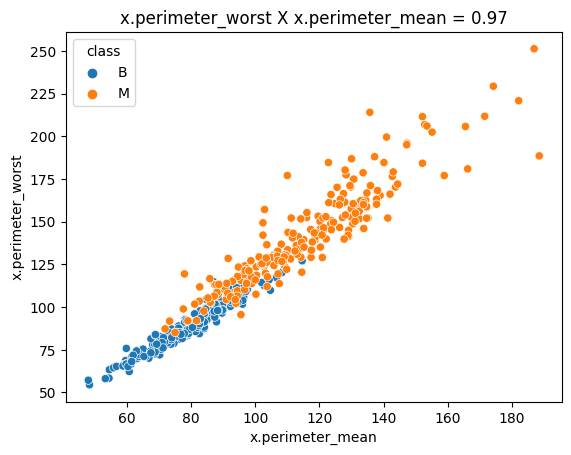

In [34]:
sns.scatterplot(x='x.perimeter_mean', y='x.perimeter_worst', hue = 'class', data=dataset_balanceado)
plt.title('x.perimeter_worst X x.perimeter_mean = 0.97')
plt.show()

Verifica-se que o câncer maligno tende a ter um **perímetro médio** maior e com isso uma quantidade maior de **pior perímetro** que o benigno. Há correlação positiva forte-moderada

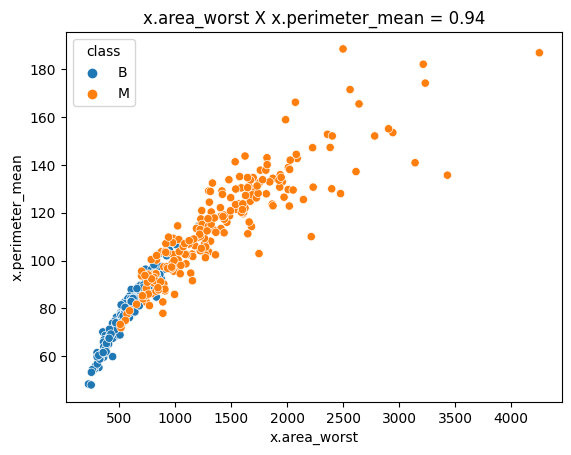

In [35]:
sns.scatterplot(x='x.area_worst', y='x.perimeter_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.area_worst X x.perimeter_mean = 0.94')
plt.show()

Verifica-se que o câncer maligno tende a ter um **perímetro médio** maior e uma **área pior** com relação ao benigno, além de **outliers**. Há uma correlação positiva forte-moderada

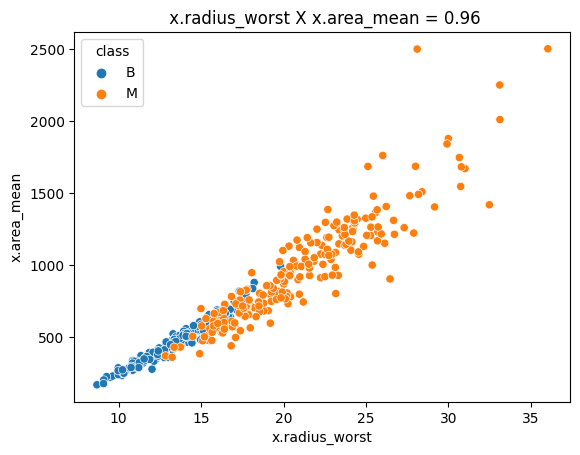

In [36]:
sns.scatterplot(x='x.radius_worst', y='x.area_mean', hue = 'class', data=dataset_balanceado)
plt.title(' x.radius_worst X x.area_mean = 0.96')
plt.show()

Há **outliers** e as células malignas tendem a ter uma área média maior com um raio pior. Há uma correlação positiva forte-moderada

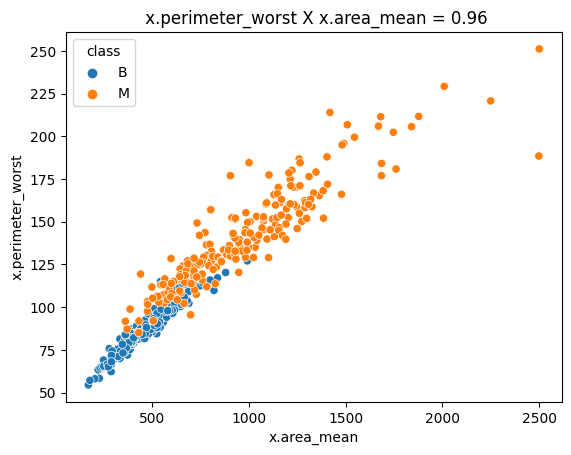

In [37]:
sns.scatterplot(x='x.area_mean', y='x.perimeter_worst', hue = 'class', data=dataset_balanceado)
plt.title(' x.perimeter_worst X x.area_mean = 0.96')
plt.show()

Nota-se que o câncer maligno possui a área maior com um perímetro pior que o benigno. Há correlação positiva forte-moderada

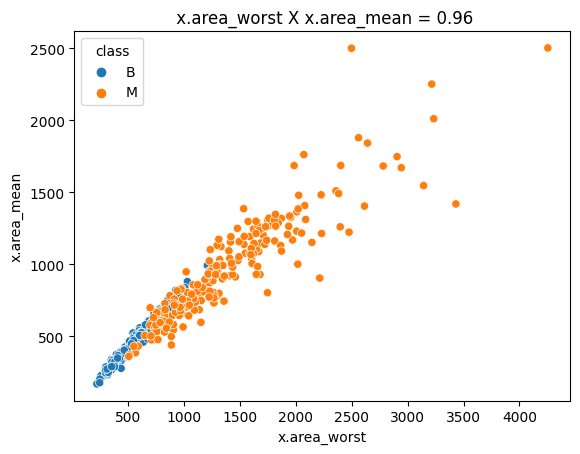

In [38]:
sns.scatterplot(x='x.area_worst', y='x.area_mean', hue = 'class', data=dataset_balanceado)
plt.title(' x.area_worst X x.area_mean = 0.96')
plt.show()

É possível análisar que com a média de área das células benignas não passa de  1000, e consequentemente não possui uma área pior.  Além de uma correlação positiva forte-moderada e outliers

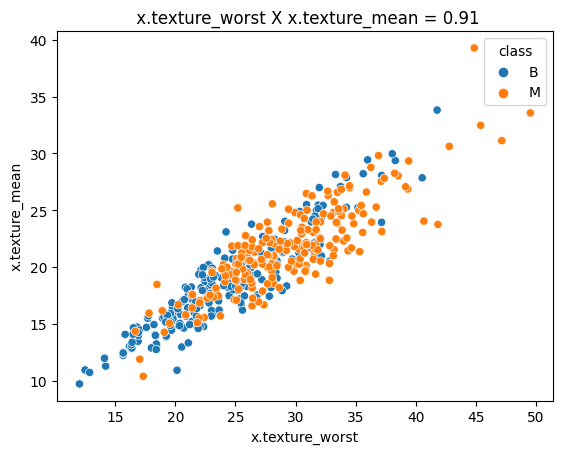

In [39]:
sns.scatterplot(x='x.texture_worst', y='x.texture_mean', hue = 'class', data=dataset_balanceado)
plt.title(' x.texture_worst X x.texture_mean = 0.91')
plt.show()

Verifica-se uma certa **padronização** na relação dos valores das texturas das células benignas e malignas. Tal fator nos leva a entender que a **identificação de malignidade através dessa caracteristica não é muito interessante**, já que essa semelhança entre as texturas do câncer maligno e benigno não possibilitam uma identificação precisa da natureza do câncer.

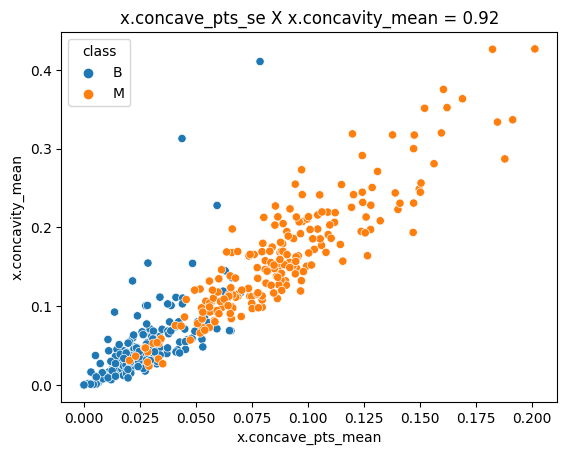

In [40]:
sns.scatterplot(x='x.concave_pts_mean', y='x.concavity_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.concave_pts_se X x.concavity_mean = 0.92')
plt.show()


Há uma correlação positiva moderada-forte e as células malignas tendem a ser mais côncavas. Porém é possível notar a presença de outlies com relação as benignas.


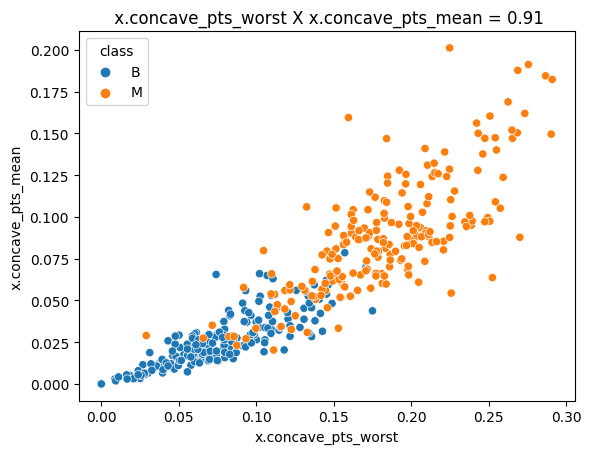

In [41]:
sns.scatterplot(x='x.concave_pts_worst', y='x.concave_pts_mean', hue = 'class', data=dataset_balanceado)
plt.title(' x.concave_pts_worst X x.concave_pts_mean = 0.91')
plt.show()

Há uma correlação positiva moderada-forte, além de notarmos que as células malignas são mais côncavas e mais graves.

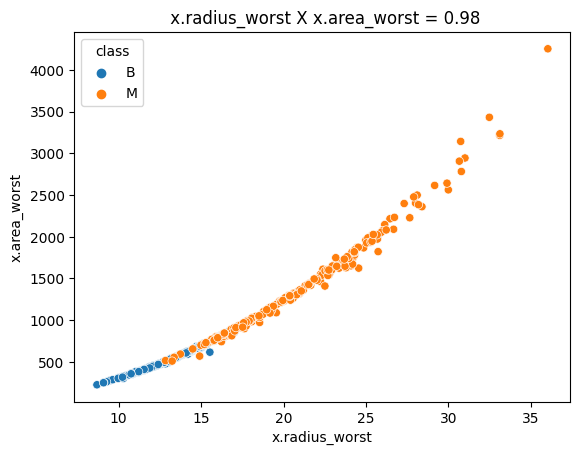

In [42]:
sns.scatterplot(x='x.radius_worst', y='x.area_worst', hue = 'class', data=dataset_balanceado)
plt.title(' x.radius_worst X x.area_worst = 0.98')
plt.show()

Há uma correlação positiva forte, com uma linha de tendência relativamente boa, e mostrando que as células malignas possuem área e raio piores.

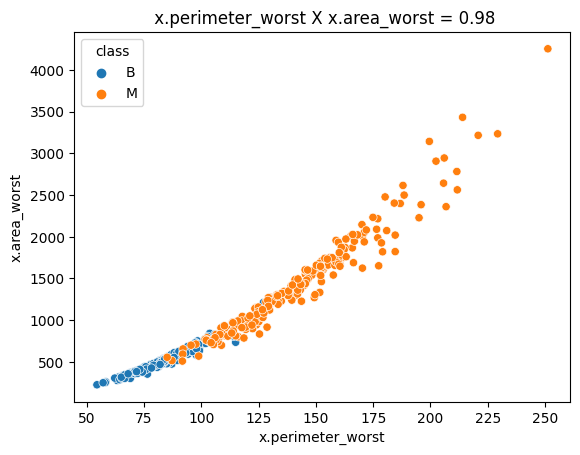

In [43]:
sns.scatterplot(x='x.perimeter_worst', y='x.area_worst', hue = 'class', data=dataset_balanceado)
plt.title(' x.perimeter_worst X x.area_worst = 0.98')
plt.show()

Há uma correlação positiva forte-moderada. Nota-se que as células malignas tendem a crescer sua área e seu perímetro de forma tendencial.

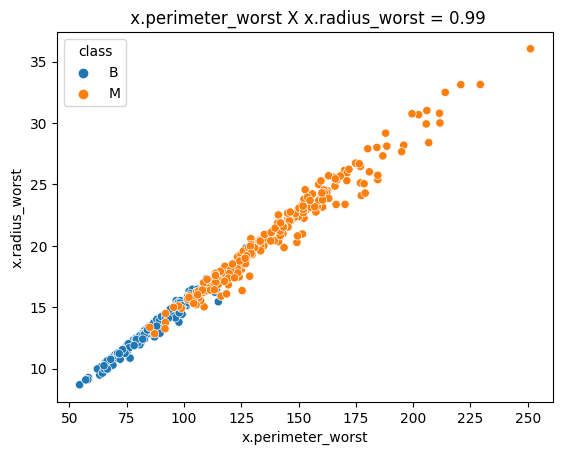

In [44]:
sns.scatterplot(x='x.perimeter_worst', y='x.radius_worst', hue = 'class', data=dataset_balanceado)
plt.title(' x.perimeter_worst X x.radius_worst = 0.99')
plt.show()

Há uma correlação positiva forte com uma linha de tendência quase que perfeita sendo as células malignas com raio e perímetro cada vez pior.

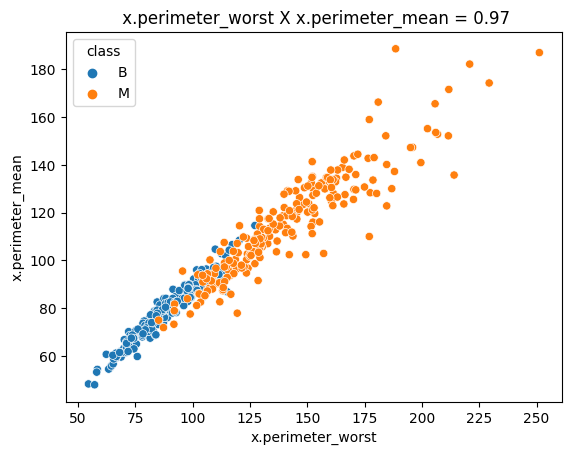

In [45]:
sns.scatterplot(x='x.perimeter_worst', y='x.perimeter_mean', hue = 'class', data=dataset_balanceado)
plt.title(' x.perimeter_worst X x.perimeter_mean = 0.97')
plt.show()

Há uma correlação positiva forte-moderada, sendo as células malignas com perímetro médio maior e perímetro cada vez pior.

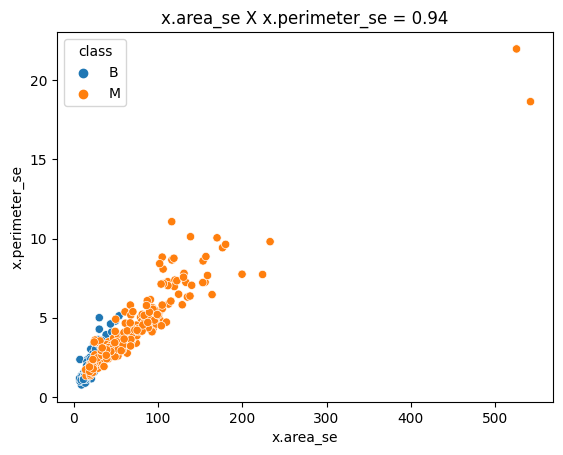

In [46]:
sns.scatterplot(x='x.area_se', y='x.perimeter_se', hue = 'class', data=dataset_balanceado)
plt.title('x.area_se X x.perimeter_se = 0.94')
plt.show()

Os **tumores malignos** possuem mais erros nas estimativas da area e do perímetro da celula do que benignos. Além disso, há presença de **outliers**.

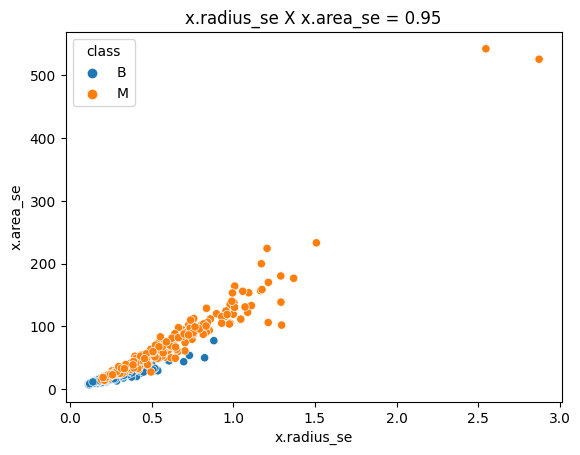

In [47]:
sns.scatterplot(x='x.radius_se', y='x.area_se', hue = 'class', data=dataset_balanceado)
plt.title('x.radius_se X x.area_se = 0.95')
plt.show()


Os **tumores malignos** possuem mais erros nas estimativas do raio e da area
da celula do que benignos. Além disso, há presença de **outliers**.

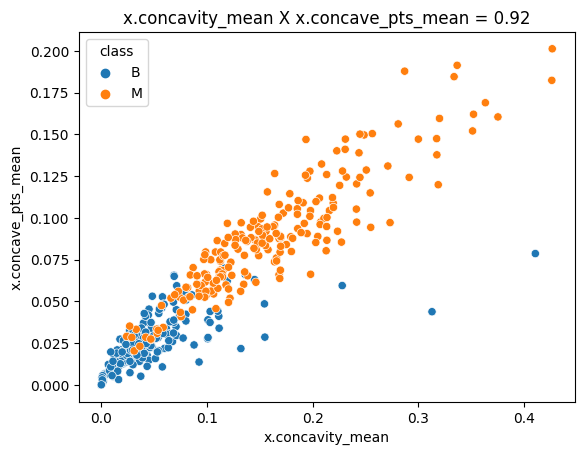

In [48]:
sns.scatterplot(x='x.concavity_mean', y='x.concave_pts_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.concavity_mean X x.concave_pts_mean = 0.92')
plt.show()

Os tumores malignos possum uma concavidade média maior e mais curvas, porém também a presença de outliers.

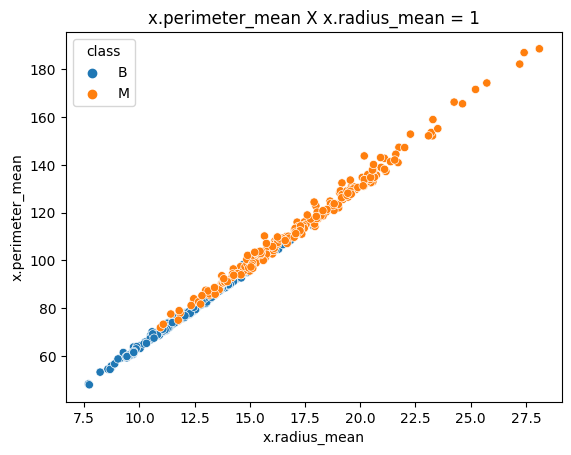

In [49]:
sns.scatterplot(x='x.radius_mean', y='x.perimeter_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.perimeter_mean X x.radius_mean = 1')
plt.show()

Os **tumores malignos** tendem a ter um comprimento médio do perímetro
e da raio **maior** que os benignos. Há uma correlação positiva forte-moderada e uma linha de tendência quase perfeito.

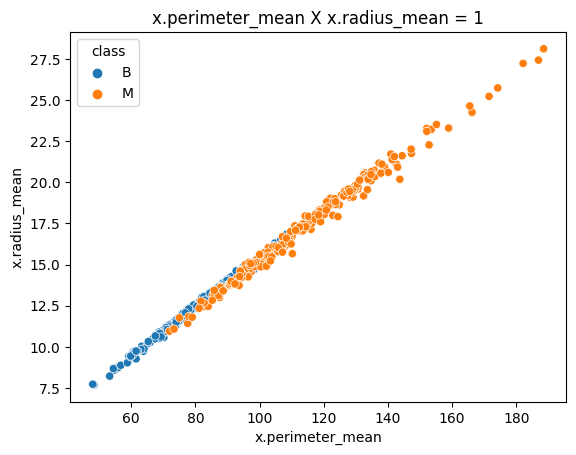

In [50]:
sns.scatterplot(x='x.perimeter_mean', y='x.radius_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.perimeter_mean X x.radius_mean = 1')
plt.show()

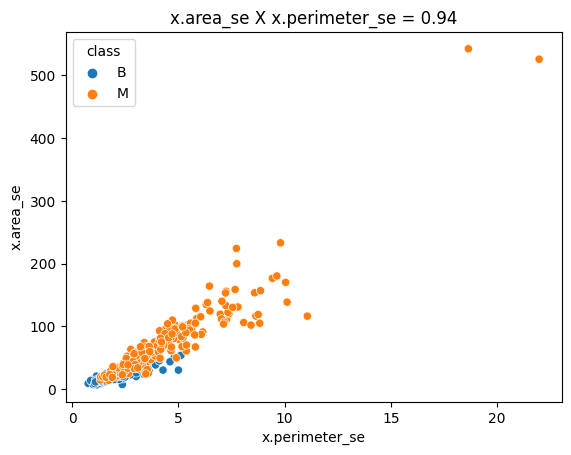

In [51]:
sns.scatterplot(x='x.perimeter_se', y='x.area_se', hue = 'class', data=dataset_balanceado)
plt.title('x.area_se X x.perimeter_se = 0.94')
plt.show()

Os **tumores malignos** possuem mais erros nas estimativas da area e do perímetro da celula do que benignos. Além disso, há presença de **outliers**.

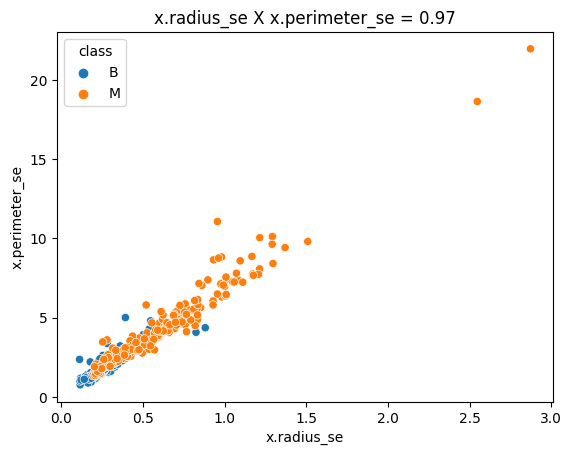

In [52]:
sns.scatterplot(x='x.radius_se', y='x.perimeter_se',  hue = 'class', data = dataset_balanceado)
plt.title('x.radius_se X x.perimeter_se = 0.97')
plt.show()


Os **tumores malignos** possuem mais erros nas estimativas do raio e do perímetro da celula do que benignos. Além disso, há presença de **outliers**.

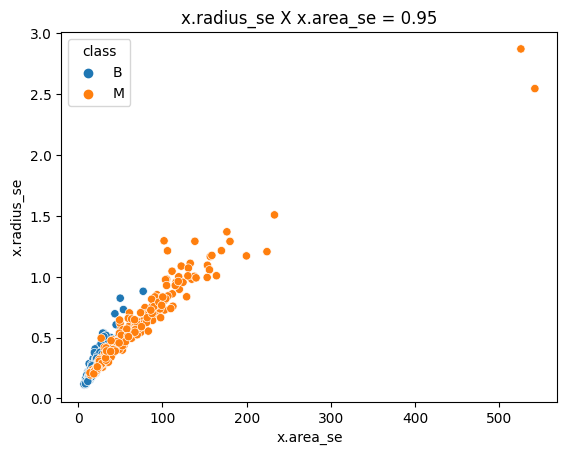

In [53]:
sns.scatterplot(x='x.area_se', y='x.radius_se', hue = 'class', data=dataset_balanceado)
plt.title('x.radius_se X x.area_se = 0.95')
plt.show()

Os **tumores malignos** possuem mais erros nas estimativas da area e do raio da celula do que benignos. Além disso, há presença de **outliers**.

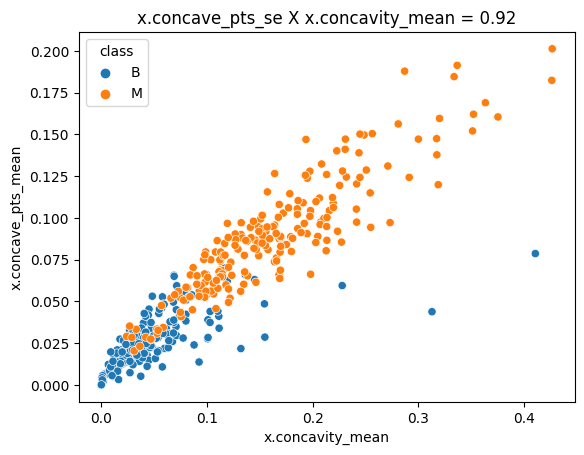

In [54]:
sns.scatterplot(x='x.concavity_mean', y='x.concave_pts_mean', hue = 'class', data=dataset_balanceado)
plt.title('x.concave_pts_se X x.concavity_mean = 0.92')
plt.show()

## **Conclusão das Análises dos Scatter Plots:**

>Tamanho e Forma das Células: A análise dos scatter plots revela que tumores malignos tendem a exibir células de maior tamanho, refletido em maior raio, área e perímetro em comparação com tumores benignos.

>Correlações: Todos os scatter plots indicam correlações positivas, demonstrando relações fortes ou moderadas entre as variáveis analisadas. Isso sugere uma interconexão significativa entre essas características.

>Erro nas Estimativas: Observou-se que tumores malignos frequentemente apresentam uma taxa de erro mais elevada nas estimativas de várias características, como raio, área e perímetro das células. Isso pode indicar maior variabilidade nos tumores malignos em comparação com os benignos.

>Côncavidade: Notou-se que as células malignas tendem a ser mais côncavas, conforme evidenciado pela relação entre a concavidade média e os pontos côncavos médios.

>Textura: A análise não revelou uma diferença distintiva na textura das células entre tumores malignos e benignos, uma vez que a relação entre textura média e textura mais acentuada mostra alguma sobreposição.

>Outliers: Vários dos scatter plots mostraram a presença de outliers, que podem ser importantes para compreender a variabilidade nos dados.

Com base na análise dos scatter plots, pode-se concluir que tumores malignos tendem a exibir maior tamanho em termos de área, perímetro e raio do que os benignos. Além disso, a observação de taxas de erro mais elevadas nas estimativas de várias características, como raio, textura, perímetro, área, suavidade, compacidade, concavidade, pontos côncavos, simetria e fractais, é mais comum em tumores malignos do que benignos. Isso sugere que a natureza do câncer pode ser facilmente identificada dentro desses parâmetros.



A seguir a limpeza dos outliers:


Em um primeiro momento parecia necessário eliminar todos os outliers, porém, realizar esse procedimento acabou diminuindo consideravelmente a base de dados. Por isso, decidimos manter alguns e eliminar outros específicos.

Após eliminação desses outliers específicos, percebeu-se que surgiram outros outliers, além de também diminuir a base de dados.

Esses outliers possuem certa importância na análise dos dados, já que a maioria representa um caso extremo de alguma característica do câncer de natureza maligna. Tais casos são importantes uma vez que, além de determinar a natureza maligna em si, também determina quão maligno ele é.





In [55]:
columns_to_clean = ['x.area_se', 'x.concavity_se']
for column in columns_to_clean:
    Q1 = dataset_balanceado[column].quantile(0.25)
    Q3 = dataset_balanceado[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    dataset_balanceado = dataset_balanceado[(dataset_balanceado[column] >= limite_inferior) & (dataset_balanceado[column] <= limite_superior)]

In [56]:
dataset_balanceado.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,class,target
222,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,B,1
42,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468,B,1
291,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,B,1
300,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,B,1
56,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,B,1


In [57]:
dataset_balanceado.to_csv('breast_cancer_modificado.csv', index = False)